In [53]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [3]:
df = pd.read_excel('../data/bank_combined.xlsx', sheet_name = 'Sheet1')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes,marital_divorced,marital_married,marital_single
0,49,unemployed,divorced,3.0,no,780,no,no,cellular,8,...,0,1,0,0,0,1,0,1,0,0
1,37,management,divorced,3.0,no,488,yes,no,cellular,17,...,0,1,0,0,0,0,1,1,0,0
2,35,management,single,3.0,no,151,no,no,unknown,20,...,1,1,0,0,0,1,0,0,0,1
3,31,housemaid,married,2.0,no,243,yes,no,cellular,23,...,0,1,0,0,0,0,1,0,1,0
4,43,blue-collar,married,2.0,no,408,yes,no,unknown,14,...,1,0,1,0,0,1,0,0,1,0


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'month_number', 'job_admin',
       'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_no',
       'y_yes', 'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')

### Two-Sample T-Test for y_no/y_yes vs balance 

In [35]:
yes_balance = df['balance'][df['y_yes'] == 1].reset_index(drop=True)
no_balance = df['balance'][df['y_no'] == 1].reset_index(drop=True)

df_balance = pd.DataFrame({
    'yes_balance': yes_balance,
    'no_balance': no_balance
})

In [36]:
df_balance.describe()

,yes_balance,no_balance
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


In [12]:
df_balance.head()

,yes_balance,no_balance
0,488.0,780
1,243.0,151
2,320.0,408
3,1547.0,384
4,2048.0,1387


In [37]:
filtered_yes_balance = df_balance['yes_balance'].dropna()

num_samples = 1000
sample_size = 5289

bootstrap_samples = []

for _ in range(num_samples):
    sample = np.random.choice(filtered_yes_balance, size=sample_size, replace=True)
    bootstrap_samples.append(sample)

bootstrap_samples_yes_df = pd.DataFrame(bootstrap_samples)

bootstrap_samples_yes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,5279,5280,5281,5282,5283,5284,5285,5286,5287,5288
0,52.0,262.0,22.0,1612.0,-39.0,10613.0,312.0,6281.0,513.0,0.0,...,816.0,1636.0,2311.0,132.0,3417.0,893.0,70.0,1451.0,0.0,751.0
1,205.0,2948.0,684.0,2991.0,313.0,1090.0,133.0,3840.0,5561.0,751.0,...,29.0,0.0,196.0,942.0,247.0,318.0,870.0,1536.0,1538.0,265.0
2,973.0,926.0,-454.0,1506.0,93.0,506.0,740.0,0.0,382.0,3754.0,...,611.0,0.0,20.0,5275.0,653.0,507.0,200.0,2303.0,1003.0,87.0
3,701.0,376.0,48.0,1396.0,3115.0,58.0,3301.0,366.0,428.0,40.0,...,76.0,2892.0,469.0,185.0,52.0,0.0,403.0,6403.0,694.0,317.0
4,533.0,76.0,284.0,122.0,4987.0,978.0,3676.0,4256.0,3064.0,706.0,...,699.0,384.0,1188.0,4189.0,313.0,25.0,551.0,137.0,927.0,15.0


In [39]:
bootstrap_samples_yes_df.shape

(1000, 5289)

In [41]:
# with open('../data/bootstrap_samples_yes_df.pkl', 'wb') as f:
#     pickle.dump(bootstrap_samples_yes_df, f)

In [42]:
with open('../data/bootstrap_samples_yes_df.pkl', 'rb') as f:
    bootstrap_samples_yes_df = pickle.load(f)

In [43]:
yes_balance_sample_means = bootstrap_samples_yes_df.mean(axis=1)
yes_balance_sample_means.describe()

count    1000.000000
mean     1802.247006
std        49.742424
min      1658.646058
25%      1769.967196
50%      1801.720647
75%      1832.746502
max      1960.099263
dtype: float64

In [44]:
filtered_no_balance = df_balance['no_balance'].dropna()

num_samples = 1000
sample_size = 39922

bootstrap_samples = []

for _ in range(num_samples):
    sample = np.random.choice(filtered_no_balance, size=sample_size, replace=True)
    bootstrap_samples.append(sample)

bootstrap_samples_no_df = pd.DataFrame(bootstrap_samples)

bootstrap_samples_no_df.head()

,0,1,2,3,4,5,6,7,8,9,...,39912,39913,39914,39915,39916,39917,39918,39919,39920,39921
0,1055,0,1537,3072,1405,2605,0,147,1023,457,...,-205,2818,2089,99,805,1042,1874,-617,0,2364
1,142,289,23,-438,622,1303,4344,-199,409,446,...,-252,382,2089,1192,195,214,849,477,1905,3409
2,399,595,1286,0,215,228,216,1030,87,225,...,786,1480,0,105,2472,-196,884,6,265,1661
3,1840,143,6770,777,2430,741,228,566,-328,355,...,3083,300,306,809,1137,393,5041,5317,5666,130
4,-5,1098,1259,240,-29,623,518,2185,7668,2352,...,140,0,17,3850,506,1028,122,0,0,11


In [47]:
# file_path = '../data/bootstrap_samples_no_df.pkl'
# with open(file_path, 'wb') as f:
#     pickle.dump(bootstrap_samples_no_df, f)

In [48]:
file_path = '../data/bootstrap_samples_no_df.pkl'
with open(file_path, 'rb') as f:
    bootstrap_samples_no_df = pickle.load(f)

In [49]:
no_balance_sample_means = bootstrap_samples_no_df.mean(axis=1)
no_balance_sample_means.describe()

count    1000.000000
mean     1303.799456
std        14.459256
min      1264.242874
25%      1294.160263
50%      1303.697172
75%      1314.565158
max      1350.859301
dtype: float64

In [51]:
t_stat, p_value = ttest_ind(no_balance_sample_means, yes_balance_sample_means)

print("T-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

T-statistic: -304.28354650264765
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the means.


#### Conclusion: there is a signifant difference in average annual bank balances between those who sign up for a term deposit plan and those who do not. 

### Chi-Square Tests
#### House loan (yes/no) vs. term deposits (yes/no)

In [4]:
new_df = df[['housing_yes', 'housing_no', 'y_yes', 'y_no']].copy()

In [5]:
new_df.head()

,housing_yes,housing_no,y_yes,y_no
0,0,1,0,1
1,1,0,1,0
2,0,1,0,1
3,1,0,1,0
4,1,0,0,1


In [11]:
contingency_table_yes = pd.crosstab(new_df['housing_yes'], new_df['y_yes'], rownames=['housing_yes'], colnames=['y_yes'])
contingency_table_no = pd.crosstab(new_df['housing_no'], new_df['y_no'], rownames=['housing_no'], colnames=['y_no'])

In [15]:
contingency_table_no

y_no,0,1
housing_no,,
0,1935,23195
1,3354,16727


In [20]:
contingency_table_yes

y_yes,0,1
housing_yes,,
0,16727,3354
1,23195,1935


In [17]:
chi2, p, dof, expected = chi2_contingency(contingency_table_no)

print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between housing_no and y_no.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between housing_no and y_no.")

Chi-square test results:
Chi-square statistic: 874.822448867983
p-value: 2.918797605076633e-192
Degrees of freedom: 1
Expected frequencies:
[[ 2939.82813917 22190.17186083]
 [ 2349.17186083 17731.82813917]]
Reject the null hypothesis: There is a significant association between housing_no and y_no.


In [21]:
chi2, p, dof, expected = chi2_contingency(contingency_table_yes)

print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between housing_yes and y_yes.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between housing_yes and y_yes.")

Chi-square test results:
Chi-square statistic: 874.822448867983
p-value: 2.918797605076633e-192
Degrees of freedom: 1
Expected frequencies:
[[17731.82813917  2349.17186083]
 [22190.17186083  2939.82813917]]
Reject the null hypothesis: There is a significant association between housing_yes and y_yes.


#### Between previous outcome (y/n/unknown/other) and term deposit subscription (y/n)

In [23]:
new_df = df[['poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes', 'y_no']].copy()

In [24]:
new_df.head()

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_yes,y_no
0,1,0,0,0,0,1
1,1,0,0,0,1,0
2,1,0,0,0,0,1
3,1,0,0,0,1,0
4,0,1,0,0,0,1


In [25]:
melted_df = new_df.melt(id_vars=['y_yes', 'y_no'], value_vars=['poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown'])
melted_df = melted_df[melted_df['value'] == 1]
contingency_table = pd.crosstab(melted_df['variable'], melted_df['y_yes'])

In [26]:
contingency_table

y_yes,0,1
variable,,
poutcome_failure,4283,618
poutcome_other,1533,307
poutcome_success,533,978
poutcome_unknown,33573,3386


In [28]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between the results of the last campaign and that of the current.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the results of the last campaign and that of the current.")

Chi-square test results:
Chi-square statistic: 4391.5065887686615
p-value: 0.0
Degrees of freedom: 3
Expected frequencies:
[[ 4327.65747274   573.34252726]
 [ 1624.74795957   215.25204043]
 [ 1334.23596028   176.76403972]
 [32635.35860742  4323.64139258]]
Reject the null hypothesis: There is a significant association between the results of the last campaign and that of the current.


#### contact method vs. term deposit subscription 

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'month_number', 'job_admin',
       'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_no',
       'y_yes', 'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')

In [14]:
new_df2 = df[['contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_other', 'y_no', 'y_yes']].copy()

In [15]:
new_df2

,contact_cellular,contact_telephone,contact_unknown,poutcome_other,y_no,y_yes
0,1,0,0,0,1,0
1,1,0,0,0,0,1
2,0,0,1,0,1,0
3,1,0,0,0,0,1
4,0,0,1,1,1,0
...,...,...,...,...,...,...
45206,1,0,0,0,0,1
45207,1,0,0,0,0,1
45208,1,0,0,0,0,1
45209,1,0,0,0,0,1


In [19]:
melted_df2 = new_df2.melt(id_vars=['y_no', 'y_yes'], value_vars=['contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_other'])
melted_df2 = melted_df2[melted_df2['value'] == 1]
contingency_table = pd.crosstab(melted_df2['variable'], melted_df2['y_yes'])

In [20]:
contingency_table

y_yes,0,1
variable,,
contact_cellular,24916,4369
contact_telephone,2516,390
contact_unknown,12490,530
poutcome_other,1533,307


In [21]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between the contact method and subscription to a term deposit.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the contact method and subscription to a term deposit.")

Chi-square test results:
Chi-square statistic: 1062.9381943609785
p-value: 3.994899557849592e-230
Degrees of freedom: 3
Expected frequencies:
[[25801.99517545  3483.00482455]
 [ 2560.37554994   345.62445006]
 [11471.46925676  1548.53074324]
 [ 1621.16001785   218.83998215]]
Reject the null hypothesis: There is a significant association between the contact method and subscription to a term deposit.


#### contact method vs. previous campaign's outcome

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'month_number', 'job_admin',
       'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_no',
       'y_yes', 'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')

In [23]:
new_df = df[['contact_cellular', 'contact_telephone', 'contact_unknown',
             'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']].copy()

In [24]:
new_df

,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0
2,0,0,1,1,0,0,0
3,1,0,0,1,0,0,0
4,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...
45206,1,0,0,0,0,0,1
45207,1,0,0,0,0,0,1
45208,1,0,0,0,0,0,1
45209,1,0,0,0,0,0,1


In [26]:
melted_df = new_df.melt(id_vars=['contact_cellular', 'contact_telephone', 'contact_unknown'],
                        value_vars=['poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
                        var_name='poutcome', value_name='value')
melted_df = melted_df[melted_df['value'] == 1]
contingency_table = pd.crosstab(melted_df['poutcome'], melted_df[['contact_cellular', 'contact_telephone', 'contact_unknown']].idxmax(axis=1))

In [27]:
contingency_table

col_0,contact_cellular,contact_telephone,contact_unknown
poutcome,,,
poutcome_failure,4529,341,31
poutcome_other,1637,176,27
poutcome_success,1385,114,12
poutcome_unknown,21734,2275,12950


In [28]:
melted_df = new_df.melt(id_vars=['contact_cellular', 'contact_telephone', 'contact_unknown'],
                        value_vars=['poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
                        var_name='poutcome', value_name='value')

melted_df = melted_df[melted_df['value'] == 1]
contingency_table = pd.crosstab(melted_df['poutcome'], melted_df[['contact_cellular', 'contact_telephone', 'contact_unknown']].idxmax(axis=1))

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between the contact method and the poutcome.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the contact method and the poutcome.")

Chi-square test results:
Chi-square statistic: 3892.1527557821937
p-value: 0.0
Degrees of freedom: 6
Expected frequencies:
[[ 3174.5766517    315.01860167  1411.40474663]
 [ 1191.84269315   118.26856296   529.88874389]
 [  978.73603769    97.12162969   435.14233262]
 [23939.84461746  2375.59120568 10643.56417686]]
Reject the null hypothesis: There is a significant association between the contact method and the poutcome.


### One-Way ANOVA
#### poutcome vs. balance 

In [29]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'month_number', 'job_admin',
       'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_no',
       'y_yes', 'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')

In [30]:
new_df = df[['poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'balance']].copy()

In [31]:
new_df

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,balance
0,1,0,0,0,780
1,1,0,0,0,488
2,1,0,0,0,151
3,1,0,0,0,243
4,0,1,0,0,408
...,...,...,...,...,...
45206,0,0,0,1,765
45207,0,0,0,1,358
45208,0,0,0,1,1511
45209,0,0,0,1,557


In [32]:
poutcome_failure_df = new_df[new_df['poutcome_failure'] == 1][['balance']]
poutcome_other_df = new_df[new_df['poutcome_other'] == 1][['balance']]
poutcome_success_df = new_df[new_df['poutcome_success'] == 1][['balance']]
poutcome_unknown_df = new_df[new_df['poutcome_unknown'] == 1][['balance']]

,balance
0,780
1,488
2,151
3,243
6,320
...,...
8203,2974
8227,563
8243,122
8248,1026


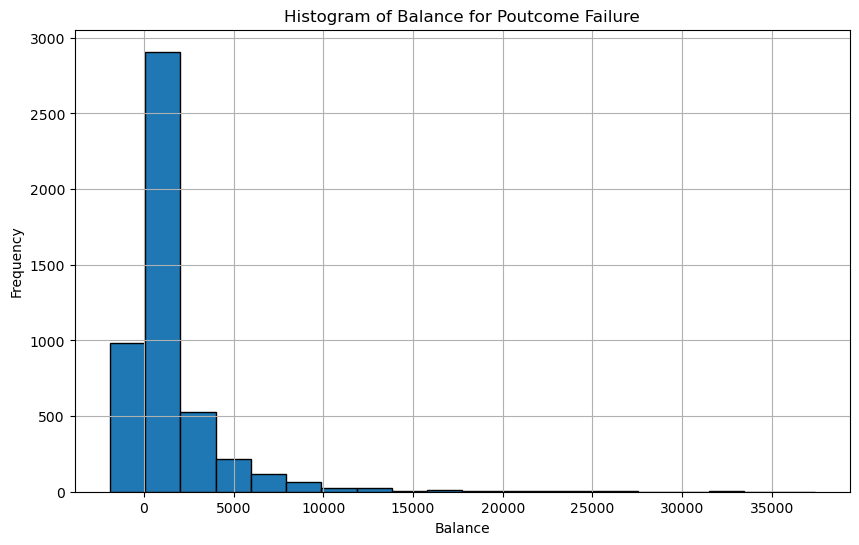

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(poutcome_failure_df['balance'], bins=20, edgecolor='black')
plt.title('Histogram of Balance for Poutcome Failure')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [48]:
n_failure = len(poutcome_failure_df)
n_other = len(poutcome_other_df)
n_success = len(poutcome_success_df)
n_unknown = len(poutcome_unknown_df)

# Bootstrap function
def bootstrap(df, n_iterations):
    bootstrap_means = np.empty(n_iterations)
    for i in range(n_iterations):
        bootstrap_sample = df.sample(n=len(df), replace=True)
        bootstrap_means[i] = bootstrap_sample.mean().values[0]
    return bootstrap_means

# Run bootstrap for each DataFrame
n_iterations = 1000
bootstrap_failure = bootstrap(poutcome_failure_df, n_iterations)
bootstrap_other = bootstrap(poutcome_other_df, n_iterations)
bootstrap_success = bootstrap(poutcome_success_df, n_iterations)
bootstrap_unknown = bootstrap(poutcome_unknown_df, n_iterations)

In [50]:
bootstrap_failure.shape

(1000,)

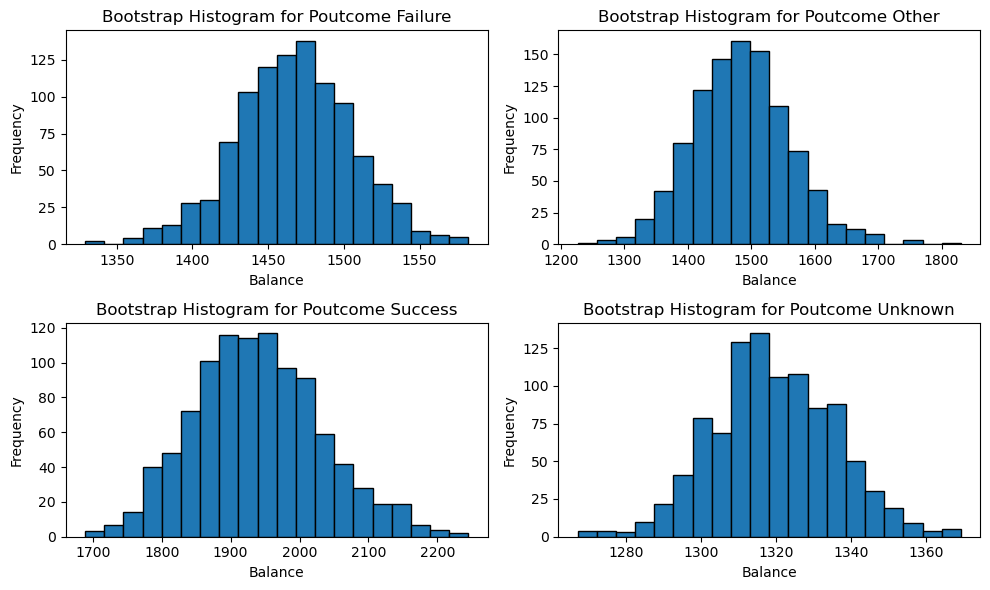

In [51]:

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(bootstrap_failure.flatten(), bins=20, edgecolor='black')
plt.title('Bootstrap Histogram for Poutcome Failure')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(bootstrap_other.flatten(), bins=20, edgecolor='black')
plt.title('Bootstrap Histogram for Poutcome Other')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(bootstrap_success.flatten(), bins=20, edgecolor='black')
plt.title('Bootstrap Histogram for Poutcome Success')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(bootstrap_unknown.flatten(), bins=20, edgecolor='black')
plt.title('Bootstrap Histogram for Poutcome Unknown')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

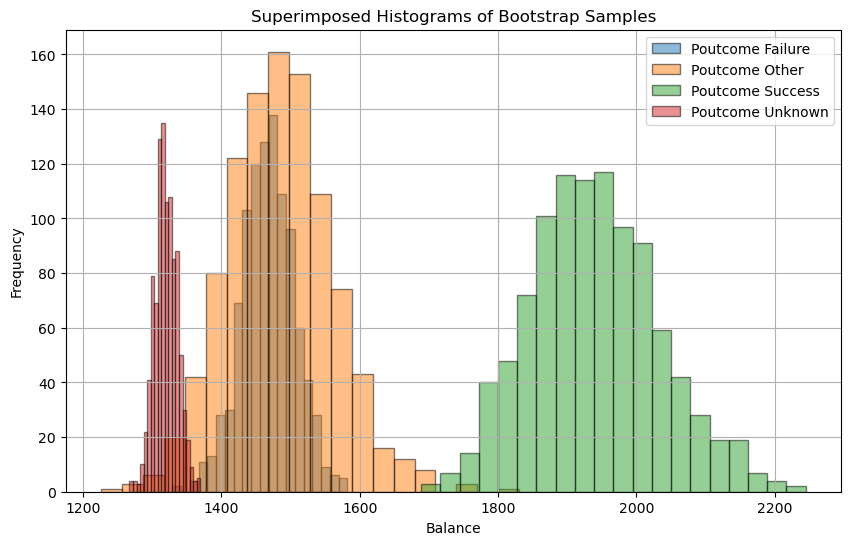

In [55]:
plt.figure(figsize=(10, 6))

plt.hist(bootstrap_failure.flatten(), bins=20, alpha=0.5, label='Poutcome Failure', edgecolor='black')
plt.hist(bootstrap_other.flatten(), bins=20, alpha=0.5, label='Poutcome Other', edgecolor='black')
plt.hist(bootstrap_success.flatten(), bins=20, alpha=0.5, label='Poutcome Success', edgecolor='black')
plt.hist(bootstrap_unknown.flatten(), bins=20, alpha=0.5, label='Poutcome Unknown', edgecolor='black')

plt.title('Superimposed Histograms of Bootstrap Samples')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [54]:
f_statistic, p_value = f_oneway(bootstrap_failure.flatten(), bootstrap_other.flatten(), bootstrap_success.flatten(), bootstrap_unknown.flatten())

# Display the results
print("One-way ANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

One-way ANOVA results:
F-statistic: 17655.13693439688
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the groups.
